In [28]:
import fcalc
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
le=LabelEncoder()
from sklearn.metrics import accuracy_score, classification_report,recall_score, f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Data preparation

In [12]:
df = pd.read_csv('data_sets/income_train.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [13]:
df.shape

(43957, 15)

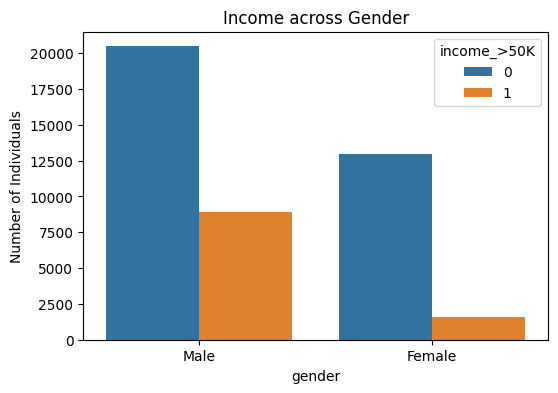

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='income_>50K', data=df)
plt.title('Income across Gender')
plt.ylabel('Number of Individuals')
plt.show()

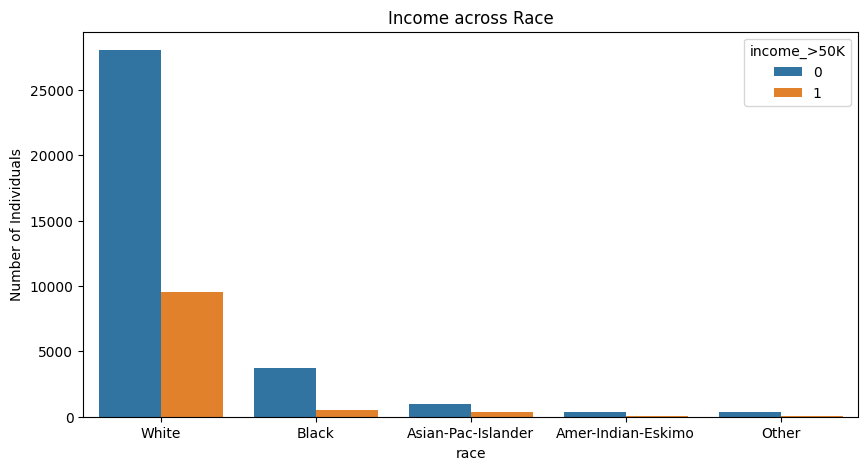

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='race', hue='income_>50K', data= df, order=df['race'].value_counts().index)
plt.title('Income across Race')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.show()

In [16]:
df["native-country"].value_counts()

native-country
United-States                 39429
Mexico                          880
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
England                         109
South                           105
Dominican-Republic               97
Jamaica                          97
Italy                            94
Japan                            83
Guatemala                        79
Vietnam                          77
Columbia                         75
Poland                           72
Haiti                            71
Portugal                         59
Taiwan                           58
Iran                             52
Nicaragua                        46
Greece                           44
Ecuador                          42
Peru         

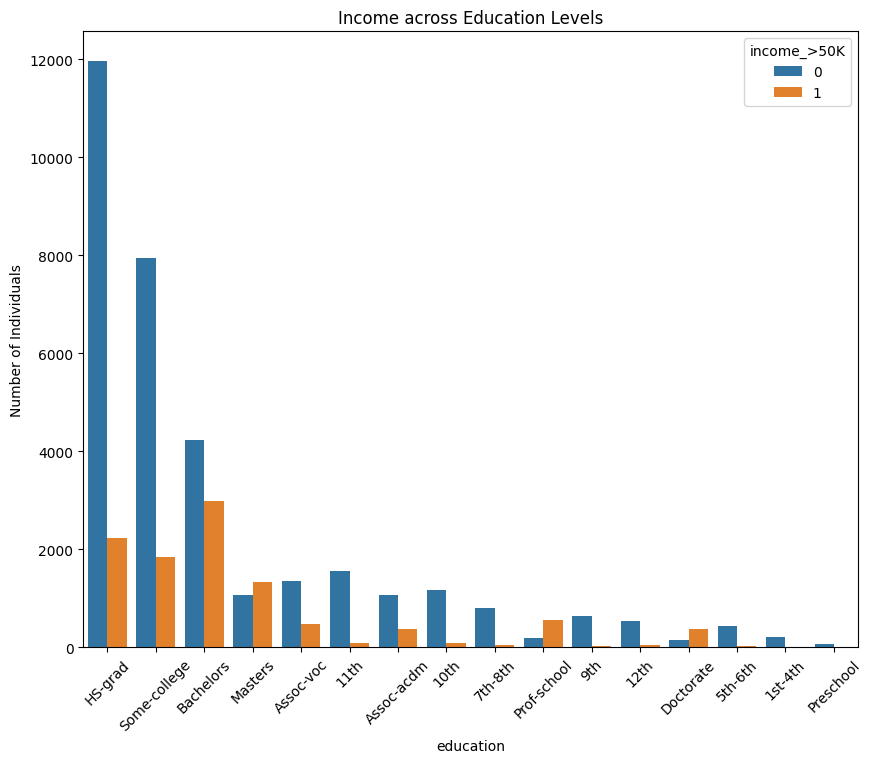

In [17]:
plt.figure(figsize=(10, 8))
sns.countplot(x='education', hue='income_>50K', data=df, order=df['education'].value_counts().index)
plt.title('Income across Education Levels')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.show()

In [18]:
df = df.drop('fnlwgt', axis = 1)
df = df.drop('native-country', axis = 1)
df = df.drop('capital-loss', axis = 1)
df = df.drop('capital-gain', axis = 1)

df = df.drop('race', axis = 1)

In [19]:
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,gender,hours-per-week,income_>50K
0,67,Private,Doctorate,16,Divorced,Exec-managerial,Not-in-family,Male,60,1
1,17,Private,12th,8,Never-married,Other-service,Own-child,Male,15,0
2,31,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,40,1
3,58,State-gov,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Male,40,0
4,25,State-gov,Some-college,10,Never-married,Other-service,Not-in-family,Male,40,0
...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,50,1
43953,19,Private,HS-grad,9,Never-married,Other-service,Own-child,Female,40,0
43954,30,Private,Some-college,10,Divorced,Sales,Not-in-family,Male,58,0
43955,46,Private,Bachelors,13,Never-married,Sales,Not-in-family,Female,35,0


In [20]:
missing_values = df.isnull().sum()
missing_values

age                   0
workclass          2498
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
gender                0
hours-per-week        0
income_>50K           0
dtype: int64

In [21]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

# Check again for missing values
missing_values_updated = df.isnull().sum()
missing_values_updated
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,gender,hours-per-week,income_>50K
0,67,Private,Doctorate,16,Divorced,Exec-managerial,Not-in-family,Male,60,1
1,17,Private,12th,8,Never-married,Other-service,Own-child,Male,15,0
2,31,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,40,1
3,58,State-gov,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Male,40,0
4,25,State-gov,Some-college,10,Never-married,Other-service,Not-in-family,Male,40,0
...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,50,1
43953,19,Private,HS-grad,9,Never-married,Other-service,Own-child,Female,40,0
43954,30,Private,Some-college,10,Divorced,Sales,Not-in-family,Male,58,0
43955,46,Private,Bachelors,13,Never-married,Sales,Not-in-family,Female,35,0


In [22]:
df["relationship"]=le.fit_transform(df["relationship"])
df["gender"]=le.fit_transform(df["gender"])
df["occupation"]=le.fit_transform(df["occupation"])
df["marital-status"]=le.fit_transform(df["marital-status"])
df["education"]=le.fit_transform(df["education"])
df["workclass"]=le.fit_transform(df["workclass"])
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,gender,hours-per-week,income_>50K
0,67,3,10,16,0,3,1,1,60,1
1,17,3,2,8,4,7,3,1,15,0
2,31,3,9,13,2,3,0,1,40,1
3,58,6,5,4,2,13,0,1,40,0
4,25,6,15,10,4,7,1,1,40,0
...,...,...,...,...,...,...,...,...,...,...
43952,52,3,9,13,2,3,0,1,50,1
43953,19,3,11,9,4,7,3,0,40,0
43954,30,3,15,10,0,11,1,1,58,0
43955,46,3,9,13,4,11,1,0,35,0


## Lazy-fca with pattern structures

In [32]:
X = df.iloc[:1000,:-1]
y = df['income_>50K'][:1000]

X_train, X_test, y_train, y_test = train_test_split(X[:1000], y[:1000], test_size=0.3, random_state=42)

In [34]:
method = ["standard", "standard-support" , "ratio-support"]
alpha = [0.1, 0.5, 0.9]
for i in method:
    for j in alpha:
        pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train,categorical=np.array([0,1,2,3,5,6,7]), 
                                                   method = i, alpha = j)
        pat_cls.predict(X_test.values)
        acc_scr = accuracy_score(y_test,pat_cls.predictions)
        acc_max = 0.1
        if acc_scr > acc_max:
            acc_max = acc_score
        print("Method:",i,"|","Alpha:",j,"|","Accuracy:",round(acc_scr,4))
print("Best score:", acc_max)

Method: standard | Alpha: 0.1 | Accuracy: 0.71
Method: standard | Alpha: 0.5 | Accuracy: 0.41
Method: standard | Alpha: 0.9 | Accuracy: 0.0167
Method: standard-support | Alpha: 0.1 | Accuracy: 0.6767
Method: standard-support | Alpha: 0.5 | Accuracy: 0.2633
Method: standard-support | Alpha: 0.9 | Accuracy: 0.2467
Method: ratio-support | Alpha: 0.1 | Accuracy: 0.4833
Method: ratio-support | Alpha: 0.5 | Accuracy: 0.4767
Method: ratio-support | Alpha: 0.9 | Accuracy: 0.6533
Best score: 0.71


In [35]:
pat_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train,categorical=np.array([0,1,2,3,5,6,7]), 
                                                   method = "standard", alpha = 0.1)

In [36]:
pat_cls.predict(X_test.values)

In [37]:
from sklearn.metrics import accuracy_score, f1_score
acc_score = round(accuracy_score(y_test,pat_cls.predictions),4)
recall_0 = round(recall_score(y_test, pat_cls.predictions,pos_label = 0),4)
recall_1 = round(recall_score(y_test, pat_cls.predictions,pos_label = 1),4)
f_score = round(f1_score(y_test, pat_cls.predictions),4)
PatBin = {"Model": "Lazy_FCA","Accuracy": acc_score,"Recall_0": recall_0,"Recall_1": recall_1,"F_score": f_score}
PatBin

{'Model': 'Lazy_FCA',
 'Accuracy': 0.71,
 'Recall_0': 0.6491,
 'Recall_1': 0.9028,
 'F_score': 0.5991}

## Classification with standard ML tools

In [39]:
def try_models(model):
    model.fit(X_train, y_train)
    
    y_preds = model.predict(X_test)
    
    acc_score = round(accuracy_score(y_test, y_preds),4)
    recall_0 = round(recall_score(y_test, y_preds,pos_label = 0),4)
    recall_1 = round(recall_score(y_test, y_preds,pos_label = 1),4)
    f_score = round(f1_score(y_test, y_preds),4)
    result = {"Model": model,"Accuracy": acc_score,"Recall_0": recall_0,"Recall_1": recall_1,"F_score": f_score}
    return result

In [40]:
LogReg = try_models(LogisticRegression())
LogReg["Model"] = "LogisticRegression"
RanFor = try_models(RandomForestClassifier(random_state=666))
RanFor["Model"] = "RandomForest"
KNN = try_models(KNeighborsClassifier())
KNN["Model"] = "KNeighbors"
DecTree = try_models(DecisionTreeClassifier())
DecTree["Model"] = "DecisionTree"
data = [LogReg, RanFor, KNN,DecTree, PatBin]

C:\Users\artem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
final = pd.DataFrame(data)

final

,Model,Accuracy,Recall_0,Recall_1,F_score
0,LogisticRegression,0.8167,0.9035,0.5417,0.5865
1,RandomForest,0.8333,0.8816,0.6806,0.6622
2,KNeighbors,0.8167,0.8553,0.6944,0.6452
3,DecisionTree,0.7700,0.8202,0.6111,0.5605
4,Lazy_FCA,0.7100,0.6491,0.9028,0.5991
